# Comparison between triaxial ellipsoid and oblate ellipsoid

### Import the required modules and functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from fatiando import mesher, gridder, utils
from fatiando.gravmag import triaxial_ellipsoid, oblate_ellipsoid

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Set some parameters for modelling

In [2]:
# The local-geomagnetic field
F, inc, dec = 60000., 50., 20.

# boundaries of the study area
bounds = [-5000, 5000, -4000, 6000, 0, 5000]

# Create a regular grid at 100m height
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z=0)

### Triaxial ellipsoid versus oblate ellipsoid

This test compares the total-field anomalies produced by a triaxial ellipsoid with that produced by an oblate ellipsoid. The triaxial ellipsoid has semi-axes $a$, $b$, and $c$ equal to `900 m`, `601 m`, and `599 m`, respectively, and the oblate ellipsoid has semi-axes $a$ and $b$ equal to `600 m` and `900 m`, respectively. Both bodies are centered at the point `(0, 1000, 2000)`.

##### Triaxial ellipsoid

In [26]:
triaxial = mesher.TriaxialEllipsoid(0, 1000, 2000,
                                    900, 801, 799,
                                    180*np.random.rand(), 0, -90 + 180*np.random.rand(),
                                    {'remanence': [2, 64, -9],
                                     'k': [0.01, 0.01, 0.01, 0, 90, 90]})

In [27]:
# magnetization

V_t = triaxial_ellipsoid.V(triaxial.alpha,
                           triaxial.gamma,
                           triaxial.delta)
n11_t, n22_t, n33_t = triaxial_ellipsoid.demag_factors(triaxial.a,
                                                       triaxial.b,
                                                       triaxial.c)
suscep_t = triaxial_ellipsoid.K(triaxial.props['k'][0],
                                triaxial.props['k'][1],
                                triaxial.props['k'][2],
                                triaxial.props['k'][3],
                                triaxial.props['k'][4],
                                triaxial.props['k'][5])
mag_t = triaxial_ellipsoid.magnetization(n11_t, n22_t, n33_t, suscep_t, F, inc, dec,
                                         triaxial.props['remanence'][0],
                                         triaxial.props['remanence'][1],
                                         triaxial.props['remanence'][2], V_t)

In [28]:
print utils.vec2ang(np.dot(V_t, mag_t))

[2.4601390472326758, 61.903941674093794, -1.570296402209352]


##### Oblate ellipsoid

In [29]:
oblate = mesher.OblateEllipsoid(0, 1000, 2000,
                                800, 900,
                                triaxial.alpha, triaxial.delta,
                                {'remanence': [2, 64, -9],
                                 'k': [0.01, 0.01, 0.01, 0, 90]})

In [30]:
# magnetization

V_o = oblate_ellipsoid.V(oblate.alpha,
                         oblate.delta)
n11_o, n22_o = oblate_ellipsoid.demag_factors(oblate.a,
                                              oblate.b)
suscep_o = oblate_ellipsoid.K(oblate.props['k'][0],
                              oblate.props['k'][1],
                              oblate.props['k'][2],
                              oblate.props['k'][3],
                              oblate.props['k'][4])
mag_o = oblate_ellipsoid.magnetization(n11_o, n22_o, suscep_o, F, inc, dec,
                                       oblate.props['remanence'][0],
                                       oblate.props['remanence'][1],
                                       oblate.props['remanence'][2], V_o)

In [31]:
print utils.vec2ang(np.dot(V_o, mag_o))

[2.4603021350512, 61.91359843847129, -1.5794485296891487]


##### Orientation

In [32]:
R = np.array([[0, 1, 0],
              [1, 0, 0],
              [0, 0, -1]])
np.allclose(V_t, np.dot(V_o, R))

True

##### Total-field anomalies

In [33]:
# total-field anomaly produced by the triaxial ellipsoid (in nT)
tf_t = triaxial_ellipsoid.tf(xp, yp, zp, [triaxial],
                             F, inc, dec)

# total-field anomaly produced by the oblate ellipsoid (in nT)
tf_o = oblate_ellipsoid.tf(xp, yp, zp, [oblate],
                           F, inc, dec)

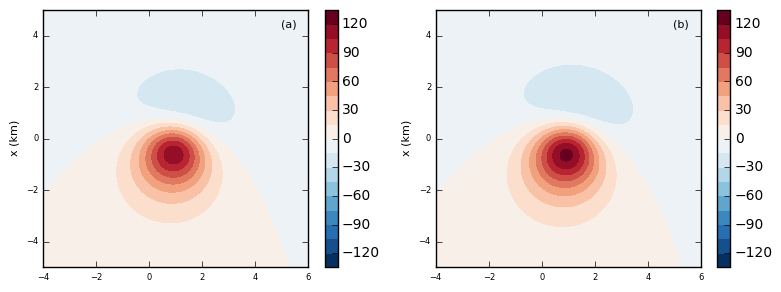

In [34]:
#plt.figure(figsize=(3.27, 1.5))
plt.figure(figsize=(8, 3))
plt.axis('scaled')

ranges = np.max(np.abs([np.min(tf_t), np.max(tf_t),
                        np.min(tf_o), np.max(tf_o)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(1,2,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)
plt.subplot(1,2,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_o.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)

plt.tight_layout()
#plt.savefig('..\\manuscript\\figures\\fields_triaxial_sphere.pdf', facecolor='w', bbox_inches='tight')

##### Field components

In [35]:
# field components produced by the triaxial ellipsoid (in nT)
bx_t = triaxial_ellipsoid.bx(xp, yp, zp, [triaxial],
                             F, inc, dec)
by_t = triaxial_ellipsoid.by(xp, yp, zp, [triaxial],
                             F, inc, dec)
bz_t = triaxial_ellipsoid.bz(xp, yp, zp, [triaxial],
                             F, inc, dec)

# field components produced by the oblate ellipsoid (in nT)
bx_o = oblate_ellipsoid.bx(xp, yp, zp, [oblate],
                           F, inc, dec)
by_o = oblate_ellipsoid.by(xp, yp, zp, [oblate],
                           F, inc, dec)
bz_o = oblate_ellipsoid.bz(xp, yp, zp, [oblate],
                           F, inc, dec)

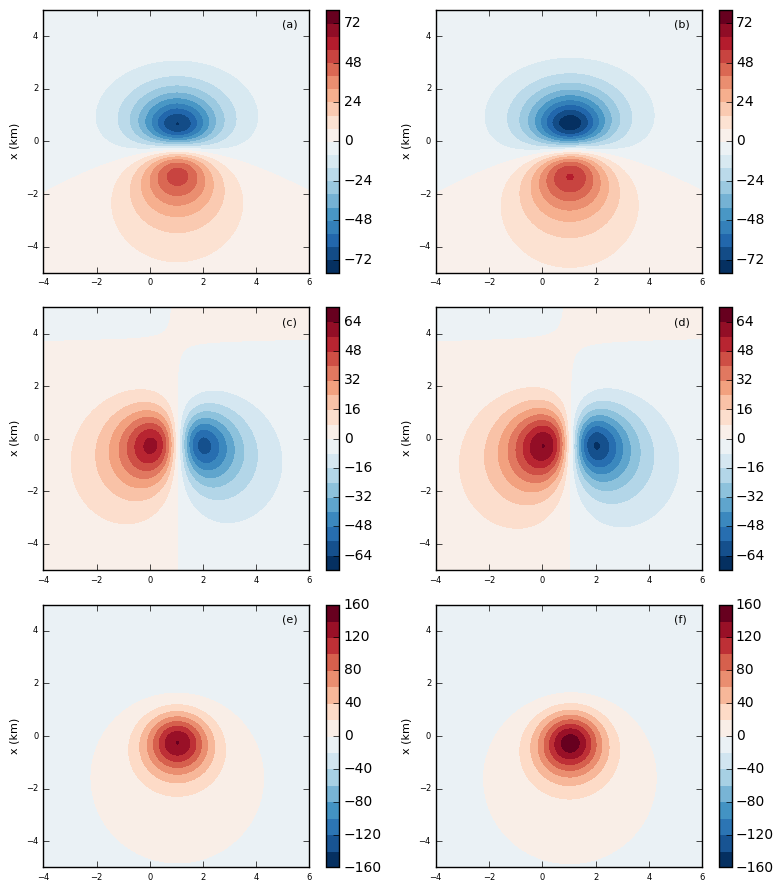

In [36]:
#plt.figure(figsize=(3.27, 1.5))
plt.figure(figsize=(8, 9))
plt.axis('scaled')

ranges = np.max(np.abs([np.min(bx_t), np.max(bx_t),
                        np.min(bx_o), np.max(bx_o)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,2,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bx_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)
plt.subplot(3,2,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bx_o.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)

ranges = np.max(np.abs([np.min(by_t), np.max(by_t),
                        np.min(by_o), np.max(by_o)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,2,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             by_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(c)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)
plt.subplot(3,2,4)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             by_o.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(d)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)

ranges = np.max(np.abs([np.min(bz_t), np.max(bz_t),
                        np.min(bz_o), np.max(bz_o)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,2,5)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bz_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(e)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)
plt.subplot(3,2,6)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bz_o.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(f)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)

plt.tight_layout()
#plt.savefig('..\\manuscript\\figures\\fields_triaxial_sphere.pdf', facecolor='w', bbox_inches='tight')